In [ ]:
import numpy as np  
import math
import matplotlib.pyplot as plt

blurred = np.zeros([193,1], dtype = float)    #blurred signal denoting the input raw signal.
deb = np.zeros([193,1], dtype = float)        # deb signal denoting the desired output.
mat = np.zeros([193,193], dtype = float)      # temorary matrix for intermediate calculations.
inverse1 = np.zeros([193,193], dtype = int)   # temorary matrix for intermediate calculations.

h = [1/16, 4/16, 6/16, 4/16, 1/16]            #given inpulse response.
temp = "33.3735 34.3744 35.7514 35.5869 36.0826 31.9046 34.1604 32.8899 33.7345 31.7042 32.0472 31.9954 29.2099 28.6328 26.879 28.234 28.4533 26.4562 27.2977 26.3674 26.0025 27.5698 27.4753 27.8671 24.565 25.9686 27.1948 24.4673 29.3415 27.0769 26.1878 28.7746 28.1229 28.0572 27.2412 25.9975 27.509 28.3029 30.2193 30.7428 28.9521 31.5281 31.4678 30.4359 29.3044 32.0193 30.4901 29.1049 30.8039 30.9927 27.8288 32.379 26.1485 26.4947 30.2314 28.4439 26.8432 26.9707 27.4959 24.6287 26.7288 25.8782 24.299 24.1763 22.5418 21.8105 22.139 23.9021 21.7907 21.2762 20.3548 20.0346 21.6838 23.1861 23.5318 22.666 21.5566 21.6734 22.9841 24.09 24.4396 20.234 23.5917 22.5824 23.6432 27.1993 23.8468 22.8253 25.8261 25.6394 25.4367 27.5169 27.208 27.1316 26.8982 29.8031 32.1206 36.0268 38.4469 38.5914 36.9945 36.938 35.9048 38.5436 36.6695 35.3315 36.8311 34.6094 35.4921 36.5117 35.0932 32.8906 32.3367 34.6908 30.946 30.9531 30.2894 30.4487 28.6813 28.1587 27.3395 30.0342 26.6117 23.2711 21.9894 20.6231 24.8874 20.2186 22.0887 20.6506 16.8824 21.329 18.4568 19.6091 16.7748 15.8912 13.5269 14.4964 14.107 11.1923 12.9435 12.8151 11.1801 12.5462 9.9419 10.7015 11.5785 10.4833 11.9865 10.9006 10.2717 13.0854 12.8299 13.0692 13.5663 14.418 14.8122 13.875 13.6661 14.6942 17.2264 14.2535 15.7885 18.766 19.1203 17.814 18.899 19.6421 20.1386 17.6416 21.2573 22.9984 26.7884 21.7178 23.567 24.5613 24.3632 25.3569 24.1146 27.3306 27.286 29.3543 29.1628 31.1193 32.3875 30.6265 29.0392 31.5744 33.5967 31.7135 32.6819 30.926 34.7257"
q = temp.split()
for i in range(len(blurred)):
    blurred[i] = float(q[i])

blurred_copy = blurred                        # Copy of the blurred signal for recovering in future.

d = "35.4312 35.1511 34.8284 34.4656 34.0656 33.6319 33.1689 32.6809 32.1733 31.6515 31.1213 30.5888 30.0605 29.5425 29.0412 28.5629 28.1135 27.6986 27.3234 26.9924 26.7097 26.4785 26.3012 26.1795 26.1141 26.1046 26.15 26.2482 26.3961 26.5898 26.8247 27.0953 27.3956 27.7188 28.058 28.4056 28.7542 29.0961 29.4237 29.7297 30.0071 30.2495 30.4508 30.6061 30.7107 30.7613 30.7553 30.6912 30.5684 30.3875 30.15 29.8584 29.5162 29.1278 28.6985 28.234 27.7409 27.2262 26.6971 26.1613 25.6264 25.0999 24.5893 24.1015 23.6434 23.2208 22.8394 22.5037 22.2177 21.9843 21.8056 21.6829 21.6163 21.6051 21.6477 21.7418 21.8839 22.0702 22.296 22.5562 22.8451 23.1568 23.4851 23.8236 24.166 24.506 24.8375 25.1545 25.4517 25.7238 25.9663 26.1749 26.3462 26.4771 26.5652 26.6086 26.606 38.5567 38.4605 38.3174 38.1283 37.8941 37.6161 37.2959 36.9352 36.5361 36.1006 35.6306 35.1284 34.5959 34.0352 33.4482 32.8367 32.2025 31.5472 30.8724 30.1795 29.4701 28.7456 28.0073 27.2567 26.4954 25.725 24.9471 24.1638 23.3771 22.5892 21.8027 21.0201 20.2445 19.4788 18.7264 17.9907 17.2752 16.5838 15.92 15.2876 14.6904 14.1319 13.6156 13.1448 12.7226 12.3517 12.0345 11.773 11.5689 11.4232 11.3368 11.3098 11.3421 11.4329 11.581 11.7848 12.0423 12.3511 12.7084 13.1112 13.5562 14.0399 14.5587 15.1089 15.6868 16.2886 16.9106 17.5492 18.2011 18.8629 19.5315 20.2041 20.878 21.5506 22.2198 22.8834 23.5395 24.1865 24.8226 25.4464 26.0563 26.651 27.2291 27.789 28.3294 28.8485 29.3448 29.8166 30.2619 30.6789 31.0656 31.4198 31.7396 32.0228 32.2673 32.4714"
w = d.split()
for i in range(len(blurred)):
    deb[i] = float(w[i])





In [ ]:
def denoise(blurred, n):                        #denoise function using local mean denoising technique.
    mat = []
    for i in range(len(blurred)):
        temp1 = 0.0
        if i < n/2:
            mat.append(blurred[i])
        elif i >= 193 - n/2:
            mat.append(blurred[i])
        else:
            for j in range((1-n)//2, (n+1)//2):
                if i+j>=0 and i+j<=len(blurred)-1:
                    temp1+=blurred[i+j]
            temp1/=n
            mat.append(temp1)


    return mat

#plt.plot(denoise(blurred, 3))

In [ ]:
j = complex(0, 1)                               #initialising j as complex number iota.
def dtft_blurred(x,w):                          # Function for calculating DTFT for signals with starting index 0.
    sum = 0.0
    for i in range(len(x)):
        sum+= x[i] * np.exp(-1 * j * w * i)
    return sum

def dtft_h(h, w):                               # Function for calculating DTFT for signals with middle index 0.
    sum = 0.0
    for i in range(5):
        sum+= h[i] * np.exp(-1 * j * w * (i-2))
    
    if sum<0.35:
        return 0.35
    return sum

gp = 200
arr = []
def divide():                                   # Function that divides the DTFTs of y and h and stores the result in a new array 'arr'.
    for i in range(gp):
        temp = dtft_blurred(blurred, 2*np.pi*i/gp) / dtft_h(h,2*np.pi*i/gp)
        arr.append(temp)
    return 

def recover():                                  #Function for recovering the blurred signal for further use.
    blurred = blurred_copy
    return

In [ ]:
def reconstruct():                                # Function to calculate inverse DTFT of elements present in array  'arr'.
    final = []

    for n in range(0,193):
        sum = 0
        for k in range(0,gp):
            z = np.exp(j * 2*np.pi* n*k/gp)
            sum = sum + arr[k]*z
        final.append(sum/gp)   

    return final

Method 1


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


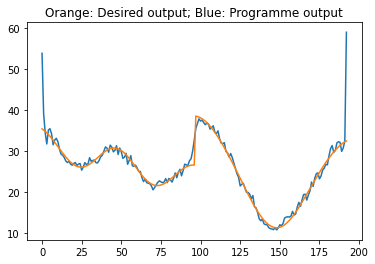

[array([53.88514115+7.12248038e-13j]), array([39.14714727-2.48263632e-12j]), array([34.47136736-3.29123395e-13j]), array([31.75272174-1.33240974e-12j]), array([35.14832916-8.17408363e-13j]), array([35.48907514-9.89075488e-14j]), array([34.25190626-3.6095571e-14j]), array([31.55658281-7.07132131e-13j]), array([32.71820512-1.04563469e-12j]), array([33.14359532-2.09183781e-13j]), array([32.32019677+6.81268375e-13j]), array([30.48241046-1.53903557e-12j]), array([29.2707571+8.54072368e-13j]), array([29.00023455+4.23483471e-13j]), array([28.46335881-1.08315135e-12j]), array([27.60035988+1.59730007e-13j]), array([27.22949176-9.37347977e-13j]), array([27.50769053-6.9348971e-14j]), array([26.84517279-6.21582785e-13j]), array([26.57116999+2.17710294e-13j]), array([27.00088834-1.85025328e-13j]), array([27.23089081-1.04563469e-12j]), array([26.45495366+4.538947e-13j]), array([26.87708203+1.16529009e-13j]), array([26.9824771+8.35598257e-14j]), array([25.35741541-3.97903932e-14j]), array([26.1033554

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


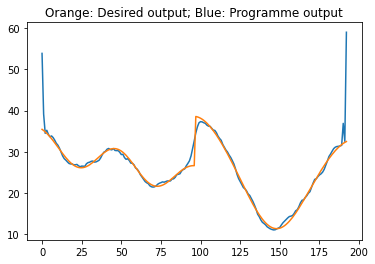

[array([53.88514115+7.12248038e-13j]), array([39.14714727-2.48263632e-12j]), array([34.47136736-3.29123395e-13j]), array([35.20172813-1.01209707e-12j]), array([34.22267993-5.22788923e-13j]), array([33.63972302-5.9839067e-13j]), array([33.8328197-5.41035661e-13j]), array([33.43187293-4.19390744e-13j]), array([32.79809726-2.6335556e-13j]), array([32.0441981-5.63943559e-13j]), array([31.58703295-2.51702659e-13j]), array([30.84343884+4.21209734e-14j]), array([29.90739154-1.3267254e-13j]), array([28.96342416-2.36980213e-13j]), array([28.31284042-1.16642696e-13j]), array([27.96022711-3.01326963e-13j]), array([27.52921475-5.10340215e-13j]), array([27.15077699-2.50167886e-13j]), array([27.03088268-3.19118953e-13j]), array([27.03116249-3.40776296e-13j]), array([26.82061512-2.36127562e-13j]), array([26.82699697-8.85052032e-14j]), array([26.90925839-1.15335297e-13j]), array([26.5805638-8.62883098e-14j]), array([26.35505673+1.4381385e-14j]), array([26.50643288-5.24664756e-14j]), array([26.47629501

In [ ]:
# Since the divide function builds the array 'arr' and the function reconstruct uses elements from 'arr', it is must to call divide each time before 
#calling reconstruct.

#Method 1: First denoising --> Then deblurring.
print("Method 1")
for i in range(1):                    
    blurred = denoise(blurred, 5)      #denoising the blurred signal and storing it back in the same array.
divide()  
t = reconstruct()                             #Building the array 'arr' using the denoised signal.
plt.plot(t)                #plotting the deblurred version of denoised signal, along with the desired output.
plt.plot(deb)
plt.title("Orange: Desired output; Blue: Programme output")
plt.show()
print(t)
print()

recover()                              # recovering the blurred array, that has been edited(denoised).

#Method 2: First deblurring --> Then denoising
print("Method 2")
divide()                                #first build 'arr' using raw signal (input).
temp_arr = reconstruct()                #debluring the signal and storing it in temporary array.
for  i in range(1):
    temp_arr = denoise(temp_arr, 5)     #denoising the deblurred signal.
plt.plot(temp_arr)
plt.plot(deb)
plt.title("Orange: Desired output; Blue: Programme output")
plt.show()
print(temp_arr)


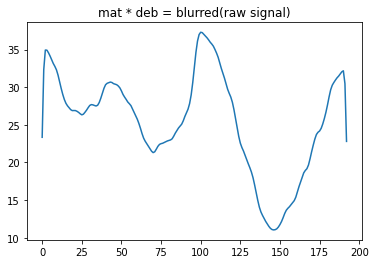

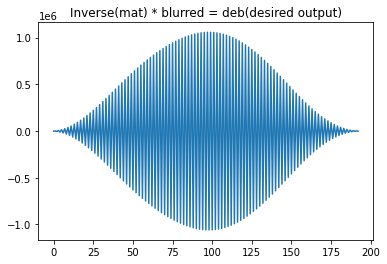

In [ ]:
def deblur(blurred, h):                                #deblur using matrix method(does not involve DTFT).
# Given that y = x convolve h, we can write 193 equations - each one for one corresponding y[n]. Hence we will have 2 column matrices, each for x and y, and
# a 2D matrix containg coefficents - elements of h. ==> We finally have a linear sysytem to solve in terms of matrices.    
    
    l = 193
    mat[0][0] = h[2]; mat[0][1] = h[1]; mat[0][2] = h[0]                                                         #Building the coefficient matrix.
    mat[1][0] = h[3]; mat[1][1] = h[2]; mat[1][2] = h[1]; mat[1][3] = h[0]

    for i in range(2, 191):
        mat[i][i-2] = h[4]; mat[i][i-1] = h[3]; mat[i][i] = h[2]; mat[i][i+1] = h[1]; mat[i][i+2] = h[0]

    mat[l-2][l-4] = h[4]; mat[l-2][l-3] = h[3]; mat[l-2][l-2] = h[2]; mat[l-2][l-1] = h[1]
    mat[l-1][l-3] = h[4]; mat[l-1][l-2] = h[3]; mat[l-1][l-1] = h[2]
    
    # we now have y(col matrix) = mat * x(col matrix), we may find x by inverse(mat) * y.
    inverse = np.linalg.inv(mat)
    ans = inverse @ blurred
    plt.plot(mat @ blurred)
    plt.title("mat * deb = blurred(raw signal)")
    plt.show()
    print()
    return ans

    #This method is giving incorrect results and the output values are blowing up. The fun part is that if we plot mat * x, we precisely get y.
    #Hence it is verified that the matrix 'mat' is legit, but its inverse has some issues.

plt.plot(deblur(blurred, h))
plt.title("Inverse(mat) * blurred = deb(desired output)")
plt.show()